In [1]:
!which python

/home/mahdi/miniconda3/bin/python


In [2]:
import os
import sys
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
import geopandas as gpd

sys.path.append('/home/mahdi/WaterBalance/')

In [13]:
%store -r Ea_pyet
%store -r ds_array_4

In [14]:
Ea_pyet = list(Ea_pyet.Hargreaves.values.flatten())
Ea_pyet_array = np.array(Ea_pyet)
ds_array_5 = ds_array_4.assign(evaporation=(['time', 'y', 'x'], Ea_pyet_array))

ds_array_5

# underground_runoff = ds_array_1['underground_runoff'].to_dataset()
# E_a_pyet.rio.write_crs("epsg:4326", inplace=True)
# E_a_pyet = E_a_pyet.rename({'lon': 'x','lat': 'y'})
# E_a_pyet

ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): (['time', 'y', 'x'], array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.17997069,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.23139744, 0.22278377,
       0.22683729, 0.22017739, 0.21518661, 0.22415461,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.21219608, 0.21074802, 0.23408864, 0.22976164,
       0.23349415, 0.23349415, 0.2294513 , 0.22992471, 0.22750425,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.21073819, 0.21161861, 0.20809762, 0.22723671, 0.22376433,
       0.2245217 , 0.22519291, 0.23024551, 0.23578463, 0.23006426,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.15646682,
       0.19822739, 0.19678868, 0.19350117, 0.22291744, 0.22207503,
       0.24338451, 0.23817272, 0.23317091, 0.25324642, 0.25065082,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.15974423, 0.15710765,
       0.19594396, 0.19511876, 0.19511876, 0.22298457, 0.22636857,
       0.25573252, 0.2513646 , 0.23847168, 0.2550091 , 0.25254605,
       0.24090355, 0.24582804, 0.25157774,        nan,        nan,
              nan,        nan, 0.13073251, 0.14775241, 0.1471377 ,
       0.17825437, 0.18040161, 0.1825496 , 0.22105153, 0.21790425,
       0.2495183 , 0.24622431, 0.23945202, 0.25444819, 0.25080136,
       0.24404996, 0.24919097,        nan,        nan,        nan,
              nan, 0.11248046, 0.12159388, 0.14505276, 0.14650099,
       0.18257185, 0.18400991, 0.18180311, 0.22282117, 0.22040162,
       0.24797215, 0.24127394, 0.23532866, 0.2519787 , 0.25796725,
       0.2510635 , 0.25192427, 0.25881414,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.17463633, 0.17176546, 0.2188642 , 0.22284646,
       0.25078556, 0.2499315 , 0.24897471, 0.2669536 , 0.26960326,
       0.26670448, 0.26418744,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.21660677, 0.224049  ,
       0.23652765,        nan, 0.23559979, 0.24251663, 0.24251663,
       0.22956675,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])) to Variable.

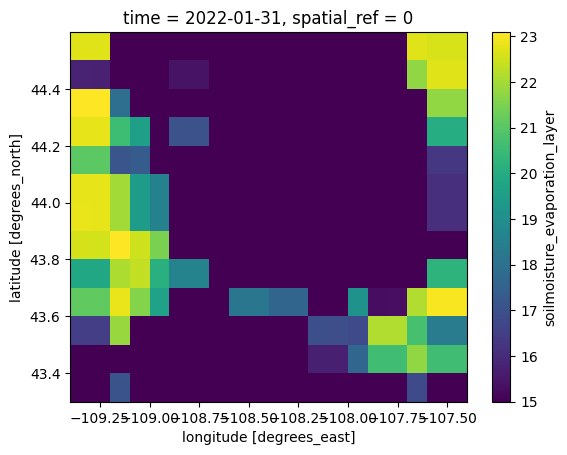

In [53]:
from qdwb.soil_content.soil_content import *
from qdwb.soil_content.constant import *



# soil_water_content_of_evaporation_layer_at_previous_step = xds_repr_match__soilmoisture
# infiltration = underground_runoff
# evaporation = E_a_pyet
# field_capacity_soil_water_content_of_evaporation_layer = 60
# permanent_wilting_point_soil_water_content_of_evaporation_layer = 15
# coverd = True
# infiltration_to_transpiration_layer = 2
# infiltration_to_transition_layer = 0

# temp_1 = (soil_water_content_of_evaporation_layer_at_previous_step.ssm.values) + (infiltration.underground_runoff.values) - (evaporation.Hargreaves.values) - (infiltration_to_transpiration_layer)

E_a_pyet = list(E_a_pyet.Hargreaves.values.flatten())
underground_runoff = list(underground_runoff.underground_runoff.values.flatten())
soil = list(xds_repr_match__soilmoisture.ssm.values.flatten())

a = np.array([SoilContent.evaporation_layer(
    soil_water_content_of_evaporation_layer_at_previous_step = float(z),
    infiltration = float(j),
    evaporation = float(i),
    field_capacity_soil_water_content_of_evaporation_layer = 60,
    permanent_wilting_point_soil_water_content_of_evaporation_layer = 15,
    coverd = True,
    infiltration_to_transpiration_layer = 2
)
for i, j, z in zip(E_a_pyet, underground_runoff, soil)])

a = a.reshape(1,13,20)
p

ds_array = ds_array_1.assign(soilmoisture_evaporation_layer=(['time', 'y', 'x'], a))
ds_array.soilmoisture_evaporation_layer.plot()

In [ ]:
import rasterio
usa = gpd.read_file('/mnt/e/Term2/payan_name/import/sample/usa.shp')

with rasterio.open('path/to/raster.tif') as src:
    # Read the shapefile geometries
    geoms = [feature["geometry"] for feature in fiona.open(shapefile)]

    # Create a mask using the shapefile geometries and rasterio
    mask = geometry_mask(geoms, out_shape=src.shape, transform=src.transform, invert=True)

    # Apply the mask to the xarray dataset
    clipped_dataset = dataset.where(mask)


